In [ ]:
cars = pd.read_csv("/content/drive/MyDrive/Cars.csv")
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
cars

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


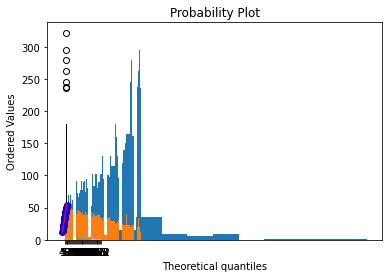

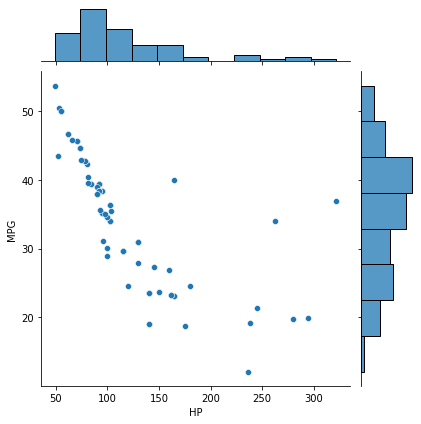

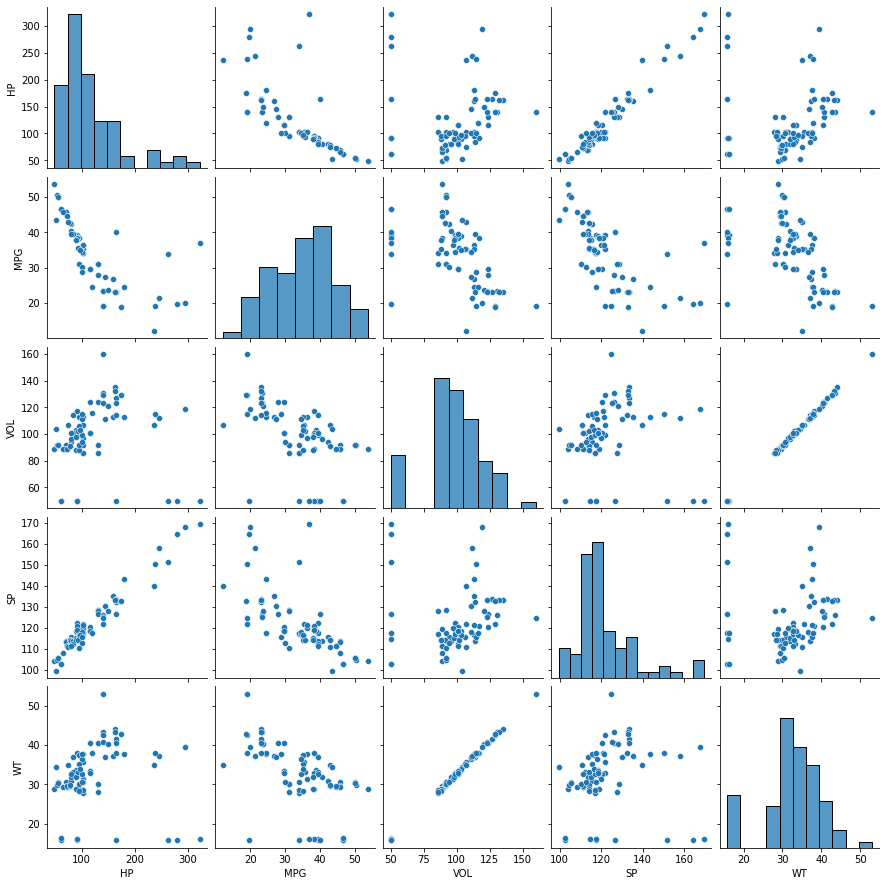

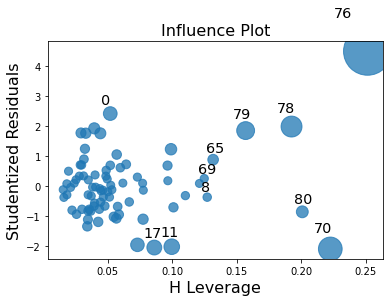

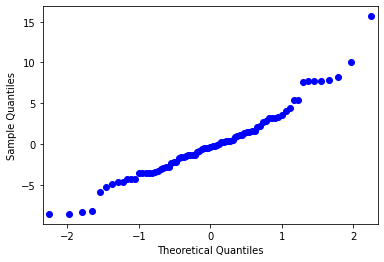

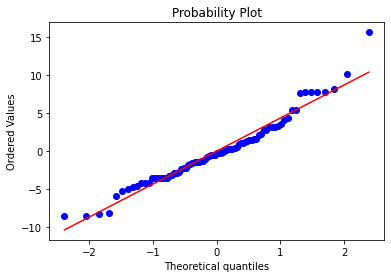

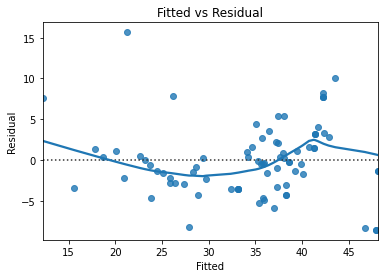

4.489307969686508

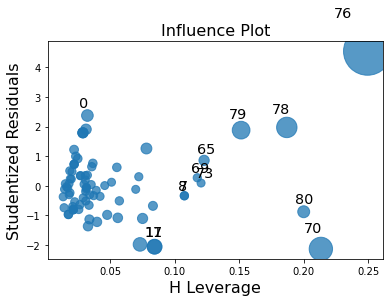

In [ ]:
# Multilinear Regression
import pandas as pd
import numpy as np

# loading the data
cars = pd.read_csv("/content/drive/MyDrive/Cars.csv")

# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

cars.describe()

#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

# HP
plt.bar(height = cars.HP, x = np.arange(1, 82, 1))
plt.hist(cars.HP) #histogram
plt.boxplot(cars.HP) #boxplot

# MPG
plt.bar(height = cars.MPG, x = np.arange(1, 82, 1))
plt.hist(cars.MPG) #histogram
plt.boxplot(cars.MPG) #boxplot

# Jointplot
import seaborn as sns
sns.jointplot(x=cars['HP'], y=cars['MPG'])

# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(cars['HP'])

# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(cars.MPG, dist = "norm", plot = pylab)
plt.show()

# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(cars.iloc[:, :])
                             
# Correlation matrix 
cars.corr()

# we see there exists High collinearity between input variables especially between
# [HP & SP], [VOL & WT] so there exists collinearity problem

# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('MPG ~ WT + VOL + SP + HP', data = cars).fit() # regression model

# Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05

# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

cars_new = cars.drop(cars.index[[76]])

# Preparing model                  
ml_new = smf.ols('MPG ~ WT + VOL + HP + SP', data = cars_new).fit()    

# Summary
ml_new.summary()

# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_hp = smf.ols('HP ~ WT + VOL + SP', data = cars).fit().rsquared  
vif_hp = 1/(1 - rsq_hp) 

rsq_wt = smf.ols('WT ~ HP + VOL + SP', data = cars).fit().rsquared  
vif_wt = 1/(1 - rsq_wt)

rsq_vol = smf.ols('VOL ~ WT + SP + HP', data = cars).fit().rsquared  
vif_vol = 1/(1 - rsq_vol) 

rsq_sp = smf.ols('SP ~ WT + VOL + HP', data = cars).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['HP', 'WT', 'VOL', 'SP'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
# As WT is having highest VIF value, we are going to drop this from the prediction model

# Final model
final_ml = smf.ols('MPG ~ VOL + SP + HP', data = cars).fit()
final_ml.summary() 

# Prediction
pred = final_ml.predict(cars)

# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()

# Q-Q plot
stats.probplot(res, dist = "norm", plot = pylab)
plt.show()

# Residuals vs Fitted plot
sns.residplot(x = pred, y = cars.MPG, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()

sm.graphics.influence_plot(final_ml)


### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
cars_train, cars_test = train_test_split(cars, test_size = 0.2) # 20% test data

# preparing the model on train data 
model_train = smf.ols("MPG ~ HP + SP + VOL", data = cars_train).fit()

# prediction on test data set 
test_pred = model_train.predict(cars_test)

# test residual values 
test_resid = test_pred - cars_test.MPG
# RMSE value for test data 
test_rmse = np.sqrt(np.mean(test_resid * test_resid))
test_rmse


# train_data prediction
train_pred = model_train.predict(cars_train)

# train residual values 
train_resid  = train_pred - cars_train.MPG
# RMSE value for train data 
train_rmse = np.sqrt(np.mean(train_resid * train_resid))
train_rmse

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


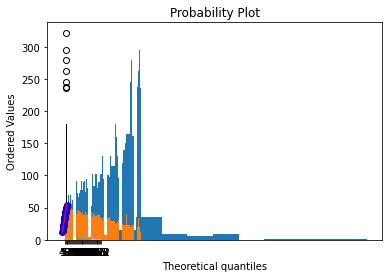

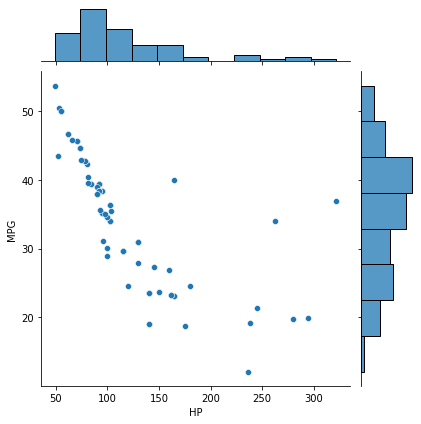

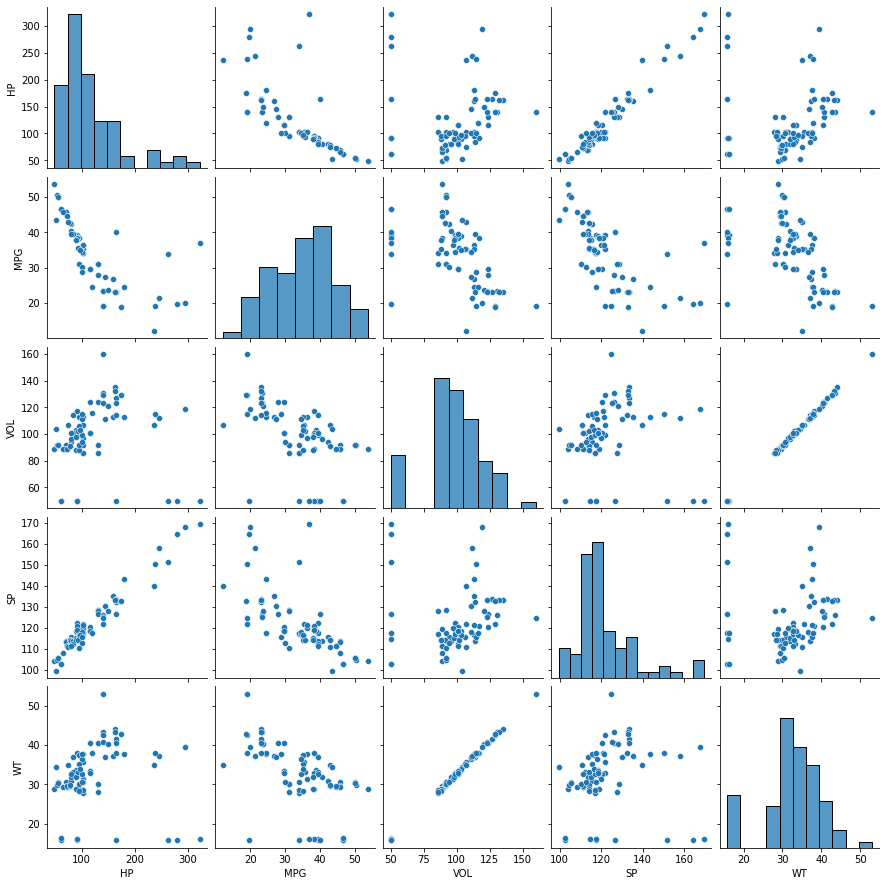

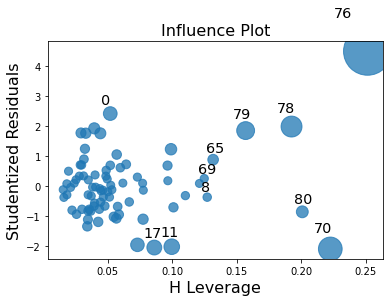

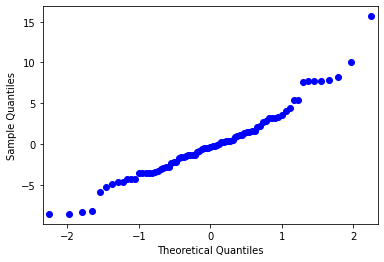

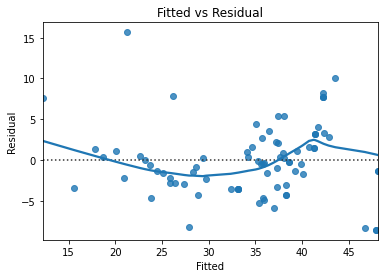

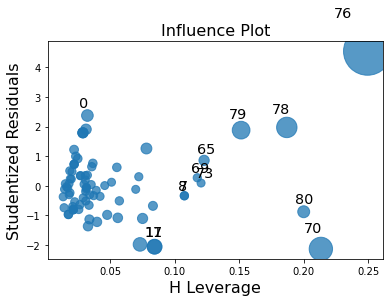

In [ ]:
# Multilinear Regression
import pandas as pd
import numpy as np

# loading the data
cars = pd.read_csv("/content/drive/MyDrive/Cars.csv")

# Exploratory data analysis:
# 1. Measures of central tendency
# 2. Measures of dispersion
# 3. Third moment business decision
# 4. Fourth moment business decision
# 5. Probability distributions of variables 
# 6. Graphical representations (Histogram, Box plot, Dot plot, Stem & Leaf plot, Bar plot, etc.)

cars.describe()

#Graphical Representation
import matplotlib.pyplot as plt # mostly used for visualization purposes 

# HP
plt.bar(height = cars.HP, x = np.arange(1, 82, 1))
plt.hist(cars.HP) #histogram
plt.boxplot(cars.HP) #boxplot

# MPG
plt.bar(height = cars.MPG, x = np.arange(1, 82, 1))
plt.hist(cars.MPG) #histogram
plt.boxplot(cars.MPG) #boxplot

# Jointplot
import seaborn as sns
sns.jointplot(x=cars['HP'], y=cars['MPG'])

# Countplot
plt.figure(1, figsize=(16, 10))
sns.countplot(cars['HP'])

# Q-Q Plot
from scipy import stats
import pylab
stats.probplot(cars.MPG, dist = "norm", plot = pylab)
plt.show()

# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(cars.iloc[:, :])
                             
# Correlation matrix 
cars.corr()

# we see there exists High collinearity between input variables especially between
# [HP & SP], [VOL & WT] so there exists collinearity problem

# preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('MPG ~ WT + VOL + SP + HP', data = cars).fit() # regression model

# Summary
ml1.summary()
# p-values for WT, VOL are more than 0.05

# Checking whether data has any influential values 
# Influence Index Plots
import statsmodels.api as sm

sm.graphics.influence_plot(ml1)
# Studentized Residuals = Residual/standard deviation of residuals
# index 76 is showing high influence so we can exclude that entire row

cars_new = cars.drop(cars.index[[76]])

# Preparing model                  
ml_new = smf.ols('MPG ~ WT + VOL + HP + SP', data = cars_new).fit()    

# Summary
ml_new.summary()

# Check for Colinearity to decide to remove a variable using VIF
# Assumption: VIF > 10 = colinearity
# calculating VIF's values of independent variables
rsq_hp = smf.ols('HP ~ WT + VOL + SP', data = cars).fit().rsquared  
vif_hp = 1/(1 - rsq_hp) 
rsq_wt = smf.ols('WT ~ HP + VOL + SP', data = cars).fit().rsquared  
vif_wt = 1/(1 - rsq_wt)
rsq_vol = smf.ols('VOL ~ WT + SP + HP', data = cars).fit().rsquared  
vif_vol = 1/(1 - rsq_vol) 

rsq_sp = smf.ols('SP ~ WT + VOL + HP', data = cars).fit().rsquared  
vif_sp = 1/(1 - rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['HP', 'WT', 'VOL', 'SP'], 'VIF':[vif_hp, vif_wt, vif_vol, vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
final_ml = smf.ols('MPG ~ VOL + SP + HP', data = cars).fit()
final_ml.summary() 

# Prediction
pred = final_ml.predict(cars)

# Q-Q plot
res = final_ml.resid
sm.qqplot(res)
plt.show()
# Residuals vs Fitted plot
sns.residplot(x = pred, y = cars.MPG, lowess = True)
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Fitted vs Residual')
plt.show()
sm.graphics.influence_plot(final_ml)


### Splitting the data into train and test data 
from sklearn.model_selection import train_test_split
cars_train, cars_test = train_test_split(cars, test_size = 0.2) # 20% test data

# preparing the model on train data 
model_train = smf.ols("MPG ~ HP + SP + VOL", data = cars_train).fit()

# prediction on test data set 
test_pred = model_train.predict(cars_test)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


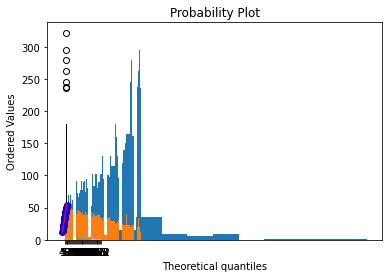

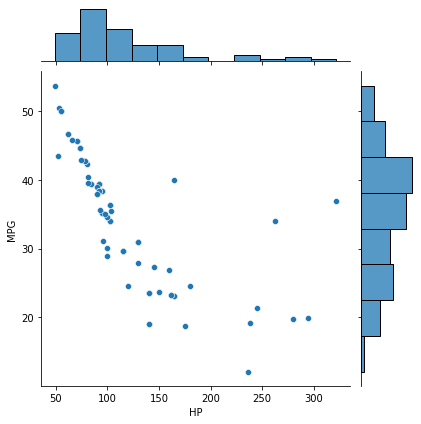

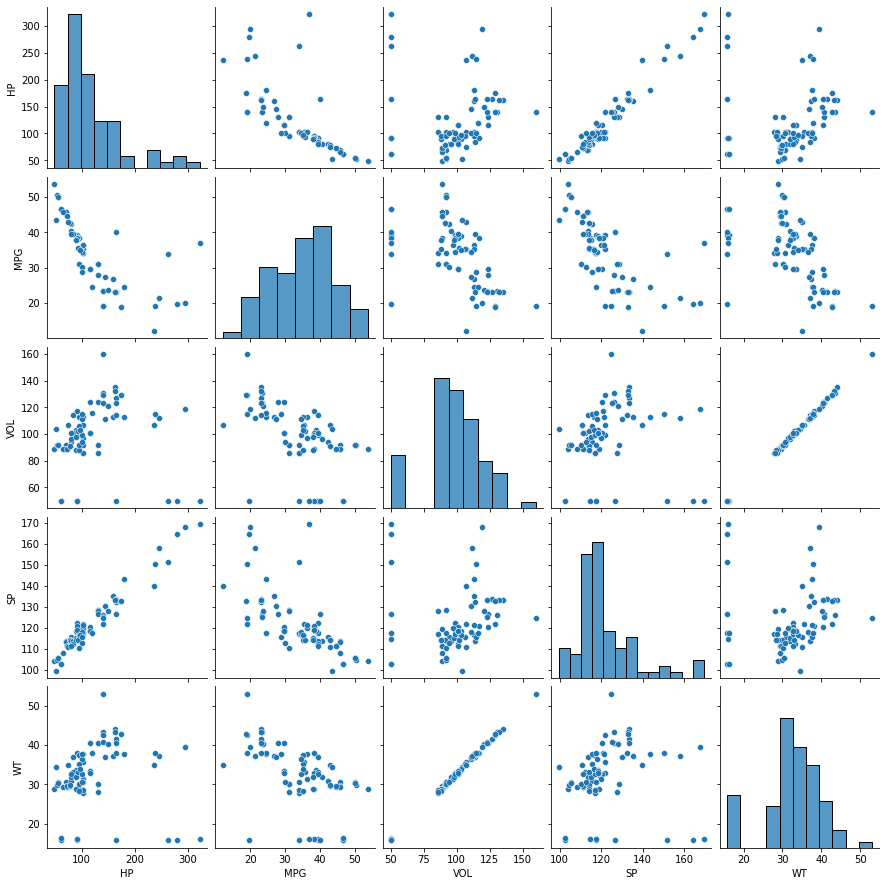

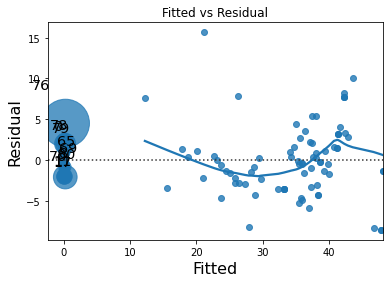

4.392373415304777

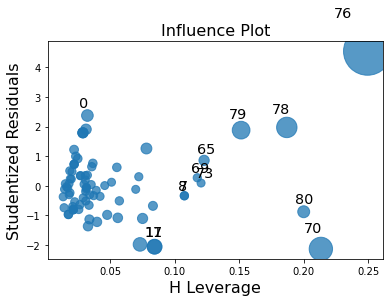

(array([15., 35.,  9.,  6.,  9.,  0.,  2.,  2.,  1.,  2.]),
 array([ 49. ,  76.3, 103.6, 130.9, 158.2, 185.5, 212.8, 240.1, 267.4,
        294.7, 322. ]),
 <a list of 10 Patch objects>)

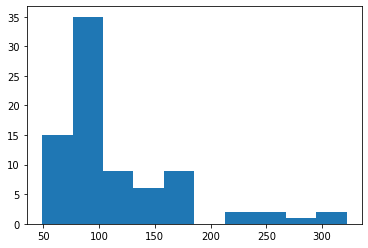

In [ ]:
plt.hist(cars.HP)

(array([ 9.,  0.,  0., 22., 20., 15.,  8.,  6.,  0.,  1.]),
 array([ 50.,  61.,  72.,  83.,  94., 105., 116., 127., 138., 149., 160.]),
 <a list of 10 Patch objects>)

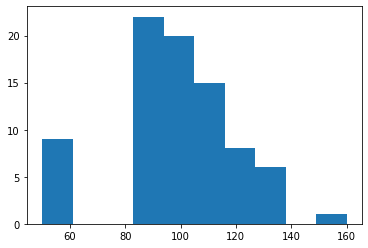

In [ ]:
plt.hist(cars.VOL)


(array([ 8., 12., 32., 10., 10.,  2.,  1.,  2.,  1.,  3.]),
 array([ 99.56490661, 106.56826723, 113.57162785, 120.57498847,
        127.57834909, 134.58170971, 141.58507032, 148.58843094,
        155.59179156, 162.59515218, 169.5985128 ]),
 <a list of 10 Patch objects>)

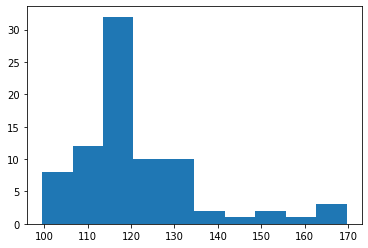

In [ ]:
plt.hist(cars.SP)

(array([ 9.,  0.,  0., 22., 19., 18.,  7.,  5.,  0.,  1.]),
 array([15.71285853, 19.44134791, 23.1698373 , 26.89832668, 30.62681606,
        34.35530544, 38.08379483, 41.81228421, 45.54077359, 49.26926298,
        52.99775236]),
 <a list of 10 Patch objects>)

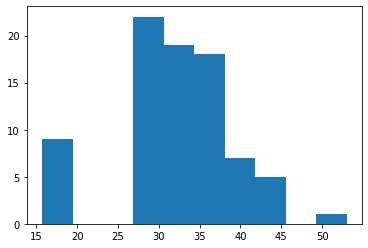

In [ ]:
plt.hist(cars.WT)

In [ ]:
import statsmodels.formula.api as smf # for regression model
         
ml1 = smf.ols('MPG ~ WT + VOL + SP + HP', data = cars).fit() # regression model

# Summary
ml1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 29 May 2021   Prob (F-statistic):           1.54e-23
Time:                        03:58:50   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(0.8227559328079224, 1.8887071462359017e-08)

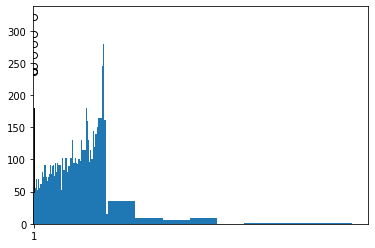

In [ ]:
import pandas as pd
import numpy as np
cars = pd.read_csv("/content/drive/MyDrive/Cars.csv")
cars.describe()
import matplotlib.pyplot as plt # mostly used for visualization purposes 
plt.bar(height = cars.HP, x = np.arange(1, 82, 1))
plt.hist(cars.HP) #histogram
plt.boxplot(cars.HP) #boxplot
from scipy.stats import shapiro
shapiro(cars.HP)



In [ ]:
import pandas as pd
import numpy as np
cars = pd.read_csv("/content/drive/MyDrive/Cars.csv")
import matplotlib.pyplot as plt # mostly used for visualization purposes 
from scipy.stats import shapiro
shapiro(cars.MPG)



(0.9779686331748962, 0.17639249563217163)

In [ ]:
import pandas as pd
import numpy as np
cars = pd.read_csv("/content/drive/MyDrive/Cars.csv")
import matplotlib.pyplot as plt # mostly used for visualization purposes 
from scipy.stats import shapiro
shapiro(cars.VOL)



(0.9129294157028198, 4.0332139178644866e-05)

In [ ]:
import pandas as pd
import numpy as np
cars = pd.read_csv("/content/drive/MyDrive/Cars.csv")
import matplotlib.pyplot as plt # mostly used for visualization purposes 
from scipy.stats import shapiro
shapiro(cars.SP)



(0.8518409729003906, 1.6284032255953207e-07)

(0.8518409729003906, 1.6284032255953207e-07)

(array([ 9.,  0.,  0., 22., 19., 18.,  7.,  5.,  0.,  1.]),
 array([15.71285853, 19.44134791, 23.1698373 , 26.89832668, 30.62681606,
        34.35530544, 38.08379483, 41.81228421, 45.54077359, 49.26926298,
        52.99775236]),
 <a list of 10 Patch objects>)

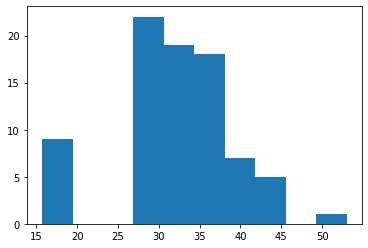

In [ ]:
import pandas as pd
import numpy as np
cars = pd.read_csv("/content/drive/MyDrive/Cars.csv")
cars.describe()
import matplotlib.pyplot as plt # mostly used for visualization purposes 
#plt.bar(height = cars.WT, x = np.arange(1, 82, 1))
plt.hist(cars.WT) #histogram
#plt.boxplot(cars.WT) #boxplot
#from scipy.stats import shapiro
#shapiro(cars.WT)

